In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('customer_churn_data.csv')
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [9]:
df.dropna()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
991,992,24,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes
993,994,38,Male,4,102.27,One-Year,Fiber Optic,409.08,No,Yes
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,Yes
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes


<function matplotlib.pyplot.show(close=None, block=None)>

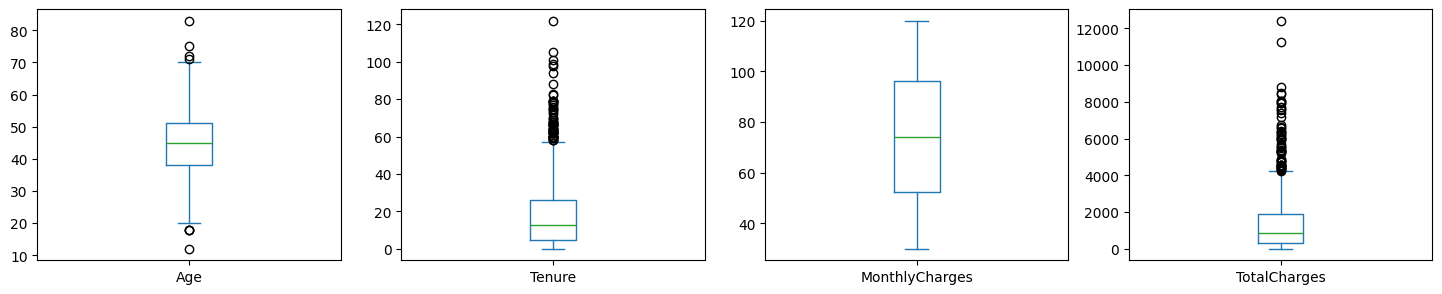

In [8]:
df[['Age','Tenure','MonthlyCharges','TotalCharges']].plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

In [20]:
def plot(df, column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,1,1)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

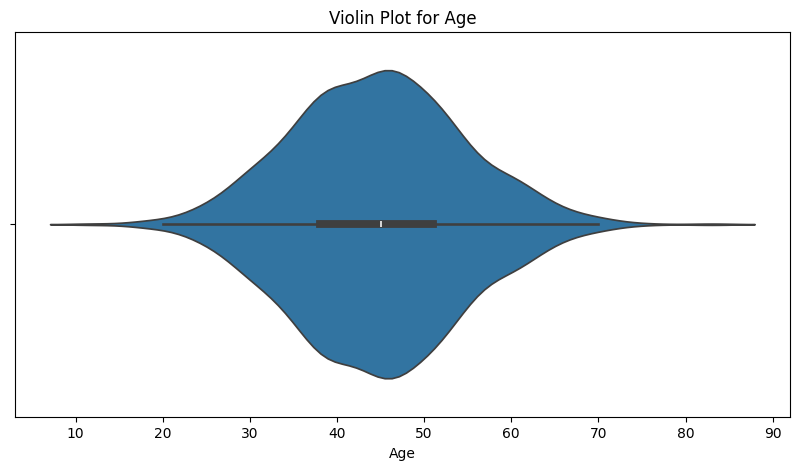

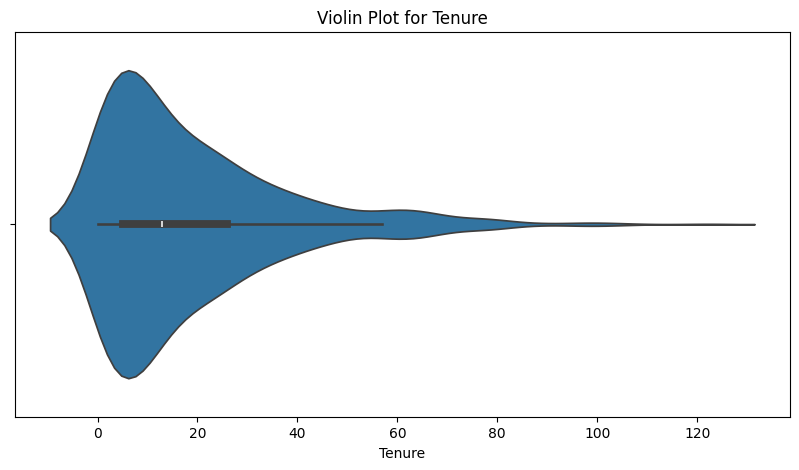

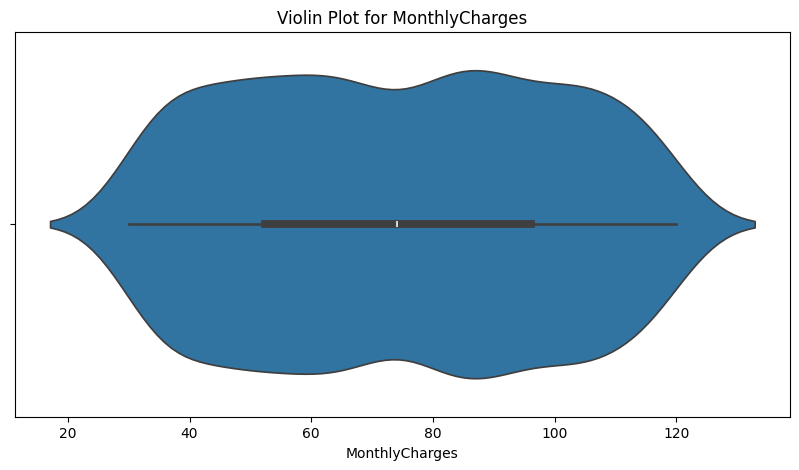

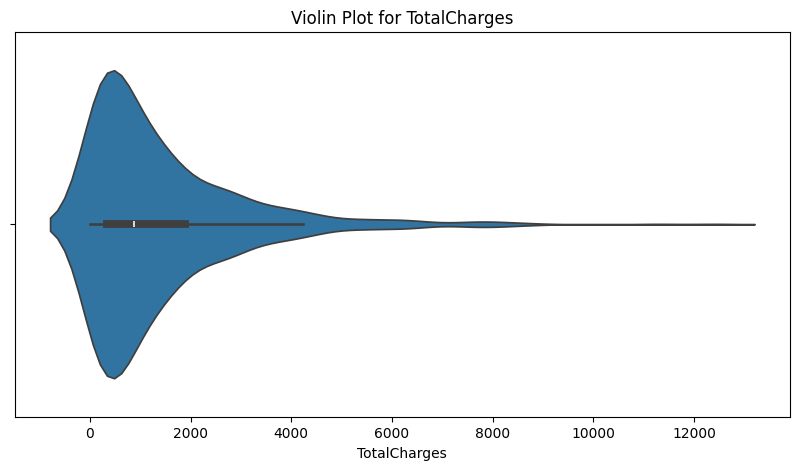

In [21]:
for i in ['Age','Tenure','MonthlyCharges','TotalCharges']:
    plot(df, i)

- Outliers were not addressed in this case, as the model benefits from the full range of data, including outliers. Given the limited dataset, removing outliers could further reduce the available information, thereby limiting the model's learning capacity and overall performance.

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn']] = df[['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn']].apply(le.fit_transform)
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,0,1,353.40,1,1
1,2,43,1,0,36.67,0,1,0.00,1,1
2,3,51,0,2,63.79,0,1,127.58,0,1
3,4,60,0,8,102.34,1,0,818.72,1,1
4,5,42,1,32,69.01,0,2,2208.32,0,1
...,...,...,...,...,...,...,...,...,...,...
995,996,42,1,41,37.14,0,1,1522.74,1,1
996,997,62,1,9,80.93,0,2,728.37,0,1
997,998,51,0,15,111.72,0,1,1675.80,1,1
998,999,39,1,68,65.67,1,2,4465.56,0,1


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split

X = df.drop('Churn',axis=1)
y = df['Churn'].values.reshape(-1,1)

scaler  = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.27, random_state=27)

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy*100}')
result = classification_report(y_test,y_pred)
print(result)

Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       234

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# ------------------------- Outlier Corrected Code ------------------------ #

In [23]:
df_new = pd.read_csv('customer_churn_data.csv')
df_new

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [25]:
df_new.dropna()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
991,992,24,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes
993,994,38,Male,4,102.27,One-Year,Fiber Optic,409.08,No,Yes
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,Yes
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes


<function matplotlib.pyplot.show(close=None, block=None)>

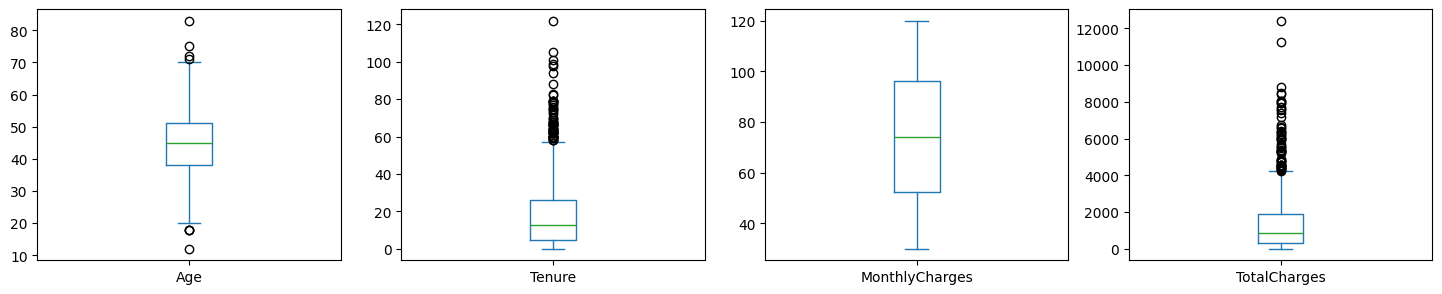

In [26]:
df_new[['Age','Tenure','MonthlyCharges','TotalCharges']].plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

In [27]:
df_new.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [33]:
df_new = df_new[df_new['InternetService'] != None]
df_new.dropna(inplace=True)

In [34]:
df_new

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
991,992,24,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes
993,994,38,Male,4,102.27,One-Year,Fiber Optic,409.08,No,Yes
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,Yes
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes


In [35]:
df_new.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [39]:
df_new[['Age','Tenure','TotalCharges']].interpolate(method ='linear',inplace = True) 

C:\Users\Srinivasa Rao\AppData\Local\Temp\ipykernel_20412\896955803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[['Age','Tenure','TotalCharges']].interpolate(method ='linear',inplace = True)


In [40]:
df_new

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
991,992,24,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes
993,994,38,Male,4,102.27,One-Year,Fiber Optic,409.08,No,Yes
994,995,34,Female,1,78.63,Month-to-Month,DSL,78.63,No,Yes
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes


<function matplotlib.pyplot.show(close=None, block=None)>

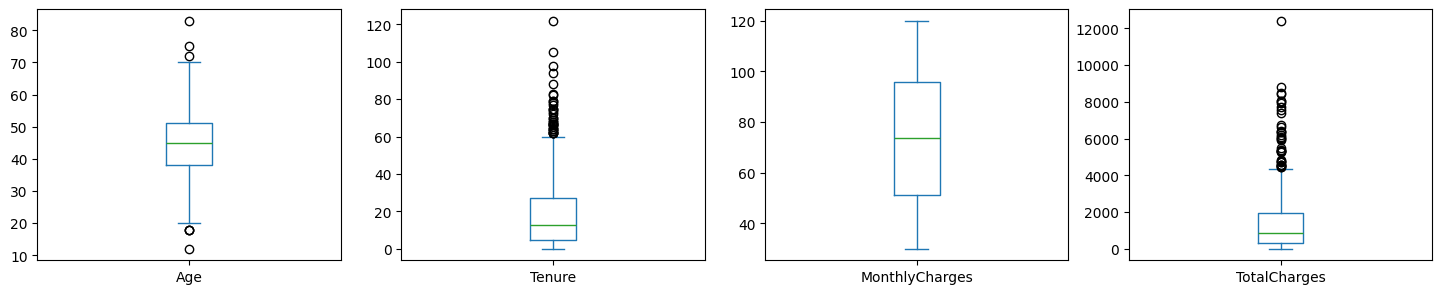

In [41]:
df_new[['Age','Tenure','MonthlyCharges','TotalCharges']].plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

In [42]:
outlier_columns = ['Age','Tenure','MonthlyCharges','TotalCharges']
before_stats = df_new[outlier_columns].describe()

# Iterate over outlier columns and remove outliers
for column in outlier_columns:
    Q1 = df_new[column].quantile(0.25)
    Q3 = df_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_new[column] = df_new[column].clip(lower_bound, upper_bound)

# Calculate summary statistics after removing outliers
after_stats = df_new[outlier_columns].describe()

# Compare the statistics before and after outlier removal
print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)

Summary statistics before removing outliers:
              Age      Tenure  MonthlyCharges  TotalCharges
count  703.000000  703.000000      703.000000    703.000000
mean    44.516358   19.056899       73.802006   1400.382119
std      9.875115   19.040358       26.037609   1576.590355
min     12.000000    0.000000       30.000000      0.000000
25%     38.000000    5.000000       51.070000    343.545000
50%     45.000000   13.000000       73.560000    839.300000
75%     51.000000   27.000000       95.775000   1948.780000
max     83.000000  122.000000      119.960000  12416.250000

Summary statistics after removing outliers:
              Age      Tenure  MonthlyCharges  TotalCharges
count  703.000000  703.000000      703.000000    703.000000
mean    44.501422   18.341394       73.802006   1302.182475
std      9.759063   16.864470       26.037609   1250.015373
min     18.500000    0.000000       30.000000      0.000000
25%     38.000000    5.000000       51.070000    343.545000
50%     45

<function matplotlib.pyplot.show(close=None, block=None)>

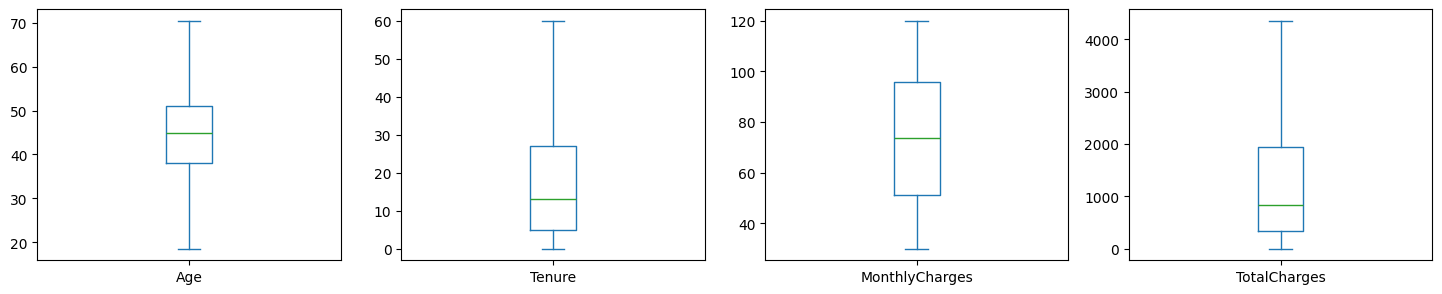

In [43]:
df_new[['Age','Tenure','MonthlyCharges','TotalCharges']].plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

In [47]:
def plot(df_new, column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,1,1)
    sns.violinplot(data=df_new, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

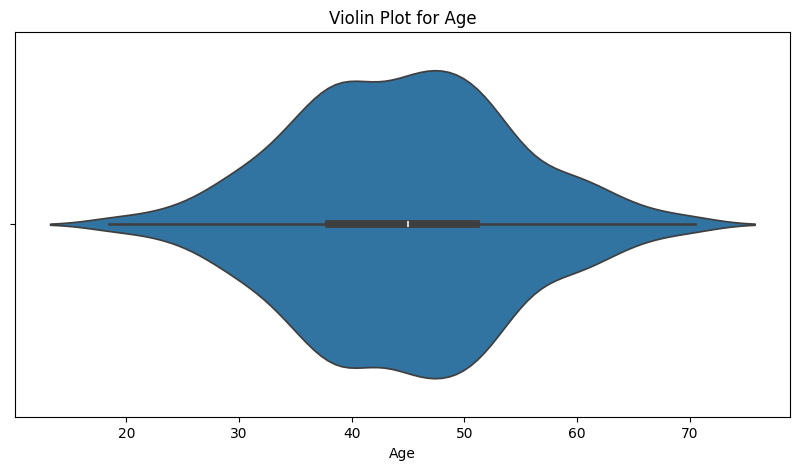

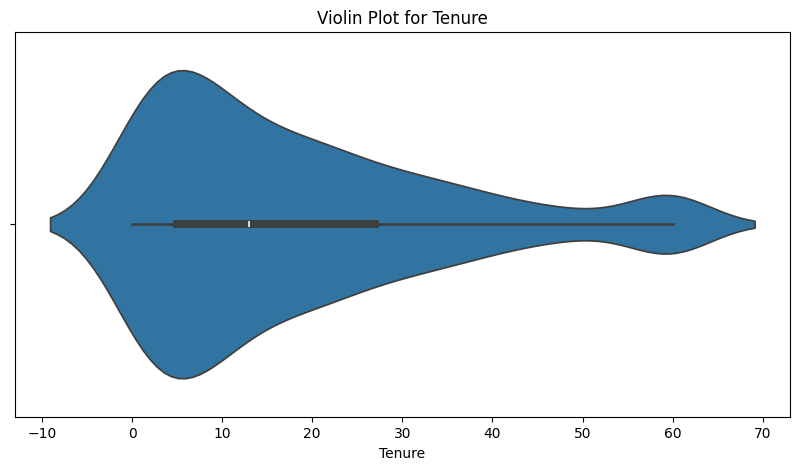

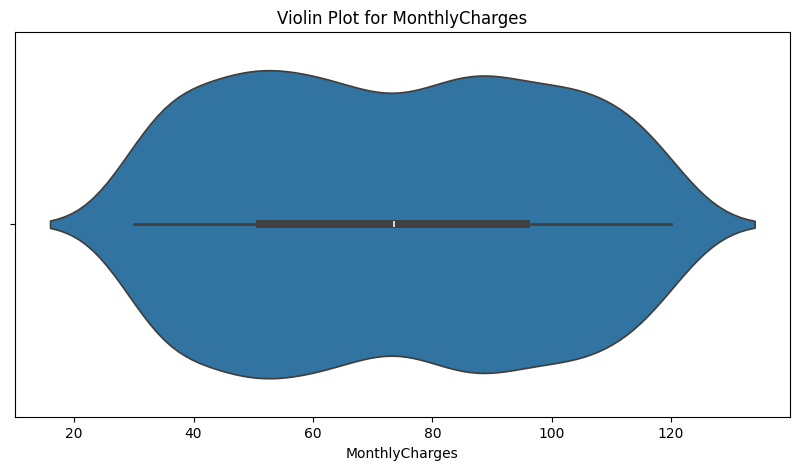

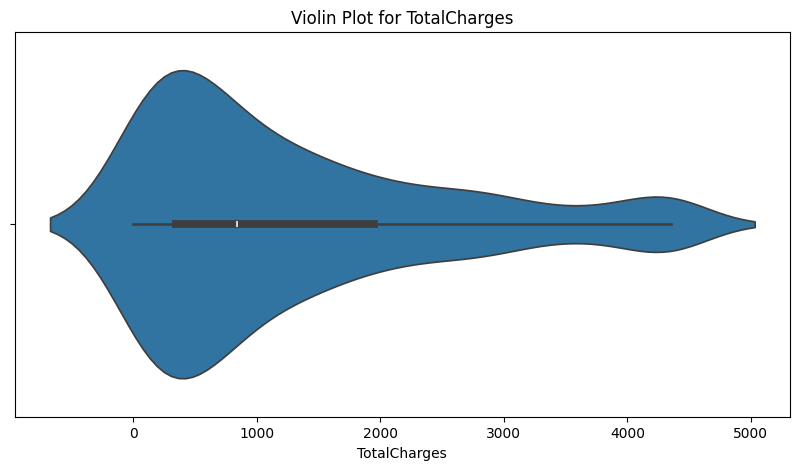

In [48]:
for i in ['Age','Tenure','MonthlyCharges','TotalCharges']:
    plot(df_new, i)

In [44]:
df_new

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49.0,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43.0,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51.0,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60.0,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
5,6,42.0,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
991,992,24.0,Male,32,81.93,Month-to-Month,Fiber Optic,2621.76,Yes,Yes
993,994,38.0,Male,4,102.27,One-Year,Fiber Optic,409.08,No,Yes
994,995,34.0,Female,1,78.63,Month-to-Month,DSL,78.63,No,Yes
995,996,42.0,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes


In [49]:
le = LabelEncoder()
df_new[['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn']] = df[['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn']].apply(le.fit_transform)
df_new

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49.0,1,4,88.35,0,1,353.40,1,1
1,2,43.0,1,0,36.67,0,1,0.00,1,1
2,3,51.0,0,2,63.79,0,1,127.58,0,1
3,4,60.0,0,8,102.34,1,0,818.72,1,1
5,6,42.0,0,16,119.75,2,0,1916.00,1,1
...,...,...,...,...,...,...,...,...,...,...
991,992,24.0,1,32,81.93,0,1,2621.76,1,1
993,994,38.0,1,4,102.27,1,1,409.08,0,1
994,995,34.0,0,1,78.63,0,0,78.63,0,1
995,996,42.0,1,41,37.14,0,1,1522.74,1,1


In [53]:
X = df_new.drop('Churn',axis=1)
y = df_new['Churn'].values.reshape(-1,1)

scaler  = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.27, random_state=27)

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy*100}')
result = classification_report(y_test,y_pred)
print(result)

c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 98.42105263157895
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       0.98      1.00      0.99       153

    accuracy                           0.98       190
   macro avg       0.99      0.96      0.97       190
weighted avg       0.98      0.98      0.98       190

